In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline
plt.style.use('ggplot')

## 1 Data description

In [2]:
cuisines = pd.read_csv('data/Cuisines.csv', header = None)
recipes = pd.read_csv('data/recipes.csv')

In [3]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4236 entries, 0 to 4235
Columns: 710 entries, 'acorn squash' to cuisine
dtypes: int64(710)
memory usage: 22.9 MB


In [4]:
recipes.describe()

,'acorn squash',adobo,'african birdseye chile pepper',ale,'aleppo pepper','alfalfa sprouts','alfredo sauce',allspice,almond,'almond butter',...,yeast,'yellow curry paste','yellow food coloring','yellow split pea','yellow squash',yogurt,zaatar,zest,zucchini,cuisine
count,4236.000000,4236.00000,4236.000000,4236.00000,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,...,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,4236.00000
mean,0.000708,0.00118,0.000944,0.00118,0.000236,0.000708,0.000944,0.013220,0.019594,0.000236,...,0.004721,0.000708,0.000236,0.000708,0.002361,0.035175,0.000472,0.003541,0.029037,5.50000
std,0.026606,0.03434,0.030718,0.03434,0.015365,0.026606,0.030718,0.114229,0.138617,0.015365,...,0.068558,0.026606,0.015365,0.026606,0.048536,0.184243,0.021726,0.059409,0.167930,3.45246
min,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.75000
50%,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.50000
75%,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.25000
max,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.00000


In [5]:
cuisines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       12 non-null     int64 
 1   1       12 non-null     object
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [6]:
cuisines = cuisines.rename(columns = {1: 'cuisine_label'})
cuisines

,0,cuisine_label
0,1,Chinese
1,2,English
2,3,French
3,4,German
4,5,Greek
5,6,Indian
6,7,Italian
7,8,Japanese
8,9,Mexican
9,10,Moroccan


## 2. Distributions of cuisines and ingredients 

In [7]:
recipes_by_cuisine = recipes.groupby('cuisine').cuisine.agg('count').to_frame('recipes') \
                            .merge(cuisines['cuisine_label'], how = 'left', left_index = True, right_index = True)

recipes_by_cuisine

,recipes,cuisine_label
cuisine,,
0,353,Chinese
1,353,English
2,353,French
3,353,German
4,353,Greek
5,353,Indian
6,353,Italian
7,353,Japanese
8,353,Mexican


In [8]:
ingredients_usage = recipes.drop('cuisine', axis=1).sum(axis = 0).sort_values(ascending = False)

In [9]:
top_10 = ingredients_usage[0:9]
top_10

garlic         2340
onion          2157
'olive oil'    1390
salt           1382
chicken        1324
pepper         1147
tomato          953
water           894
ginger          855
dtype: int64

<AxesSubplot:>

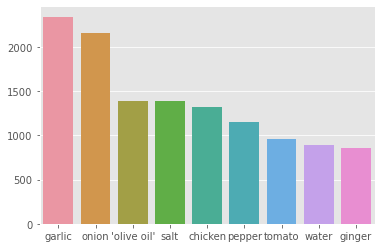

In [10]:
sns.barplot(x = top_10.index ,y = top_10)

In [11]:
def get_top_ingredients(cuisine, n = 10, plot = False):
    filtered_recipes = recipes[recipes.cuisine == cuisine]
    ingredients_usage = filtered_recipes.drop('cuisine', axis=1).sum(axis = 0).sort_values(ascending = False)
    top_n = ingredients_usage[0:n - 1]
    if plot:
        plt.figure()
        sns.barplot(x = top_n.index ,y = top_n)
        plt.title(cuisines.loc[i]['cuisine_label'])
        plt.xticks(rotation=45)
    return top_n

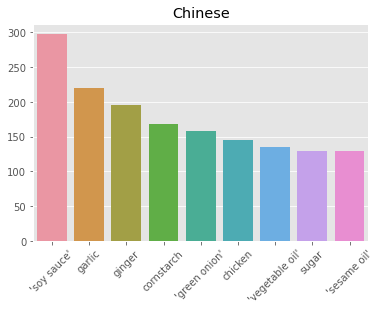

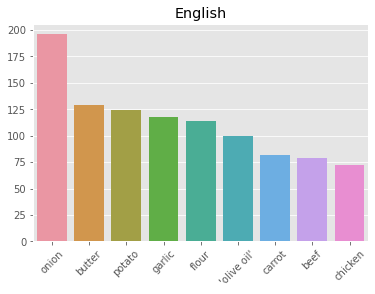

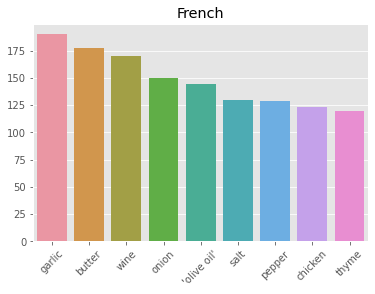

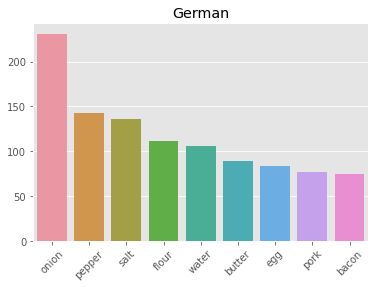

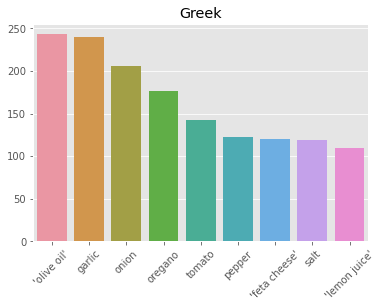

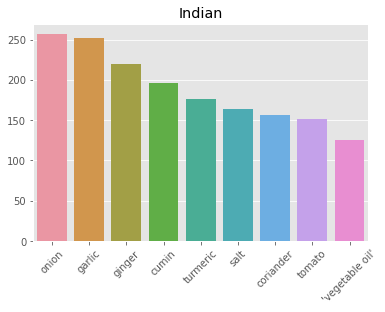

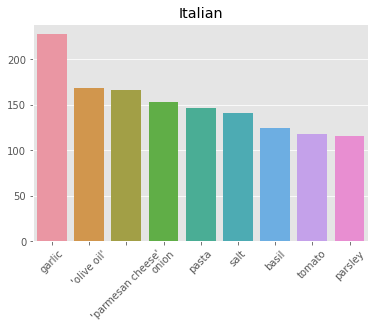

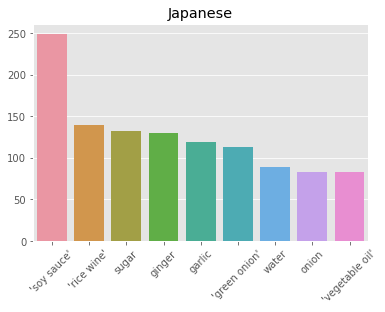

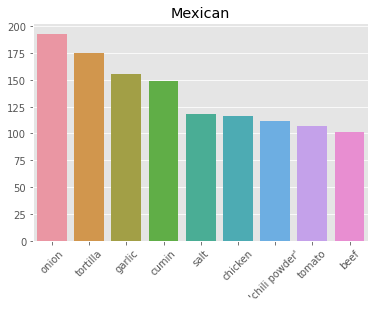

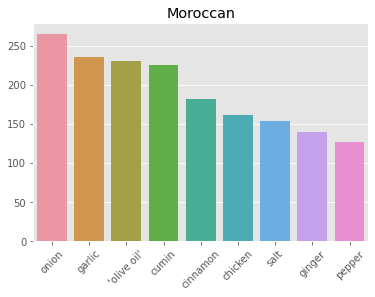

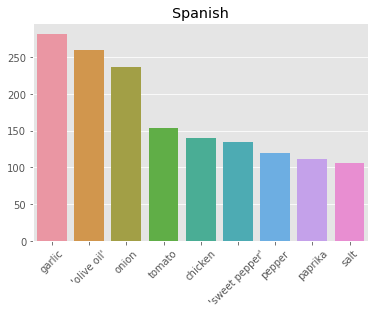

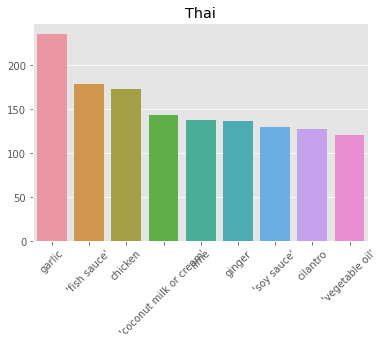

In [12]:
for i in range(cuisines.shape[0]):
    get_top_ingredients(i, n = 10, plot = True)

### Characteristic ingredients

In [13]:
def get_ingredients_sum(cuisine):
    filtered_recipes = recipes[recipes.cuisine == cuisine]
    ingredients_usage = filtered_recipes.drop('cuisine', axis=1).sum(axis = 0)
    return ingredients_usage

In [14]:
cuisines_ingredients_usage = {}
for i in range(cuisines.shape[0]):
    cuisines_ingredients_usage[cuisines.loc[i]['cuisine_label']] = get_ingredients_sum(i)

In [15]:
ingredients_usage_by_cuisine = pd.concat([cuisines_ingredients_usage[cuisines.loc[0]['cuisine_label']],
                                         cuisines_ingredients_usage[cuisines.loc[1]['cuisine_label']]], axis = 1)
for i in range(2, cuisines.shape[0]):
    ingredients_usage_by_cuisine = pd.concat([ingredients_usage_by_cuisine,
                                              cuisines_ingredients_usage[cuisines.loc[i]['cuisine_label']]], axis = 1)

ingredients_usage_by_cuisine = ingredients_usage_by_cuisine.T.reset_index()
ingredients_usage_by_cuisine['cuisine_label'] = cuisines['cuisine_label']    
ingredients_usage_by_cuisine

,index,'acorn squash',adobo,'african birdseye chile pepper',ale,'aleppo pepper','alfalfa sprouts','alfredo sauce',allspice,almond,...,yeast,'yellow curry paste','yellow food coloring','yellow split pea','yellow squash',yogurt,zaatar,zest,zucchini,cuisine_label
0,0,0,0,0,0,0,1,0,0,4,...,0,0,1,0,0,0,0,8,3,Chinese
1,1,0,0,0,5,0,0,0,2,1,...,2,0,0,1,0,4,0,0,7,English
2,0,0,0,0,0,0,0,0,0,1,...,2,0,0,0,2,2,0,2,16,French
3,0,0,0,0,0,0,0,0,13,0,...,3,0,0,0,0,1,0,1,2,German
4,0,0,1,0,0,1,0,1,10,0,...,1,0,0,0,1,36,0,1,17,Greek
5,0,0,0,1,0,0,0,0,4,14,...,0,0,0,2,0,83,0,0,2,Indian
6,0,1,0,0,0,0,0,3,2,0,...,8,0,0,0,3,0,0,0,12,Italian
7,0,0,0,0,0,0,1,0,3,1,...,1,0,0,0,0,2,0,1,2,Japanese
8,0,0,3,0,0,0,0,0,3,3,...,1,0,0,0,1,2,0,0,6,Mexican
9,0,2,0,1,0,0,1,0,17,42,...,1,0,0,0,3,15,2,1,31,Moroccan


In [16]:
mean_ingredients_usage = np.mean(ingredients_usage_by_cuisine, axis = 0)
std_ingredients_usage = np.std(ingredients_usage_by_cuisine, axis = 0)

In [17]:
def get_char_ingredients(cuisine, threshold_std = 2):
    cuisine_usage = cuisines_ingredients_usage[cuisines.loc[i]['cuisine_label']]
    threshold = mean_ingredients_usage + threshold_std*std_ingredients_usage
    usage_diff = cuisine_usage - threshold
    return cuisine_usage[usage_diff > 0]

cuisines_char_ingredients = {}

for i in range(cuisines.shape[0]):
    cuisines_char_ingredients[cuisines.loc[i]['cuisine_label']] = get_char_ingredients(i).sort_values(ascending = False)
    

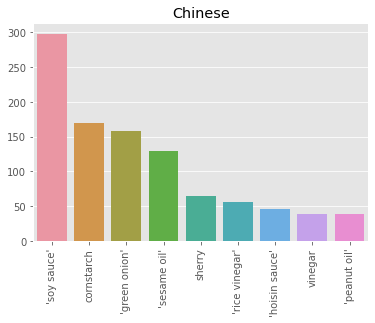

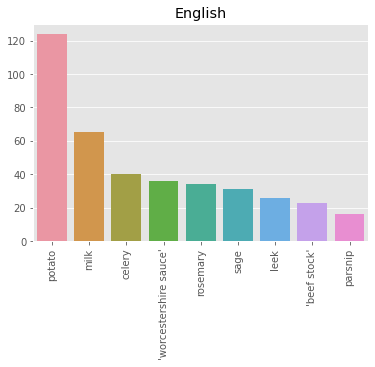

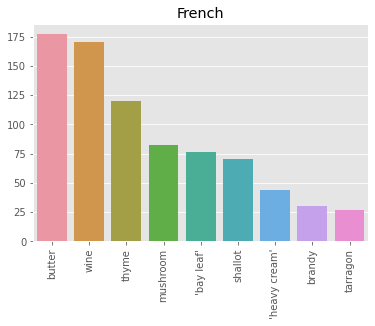

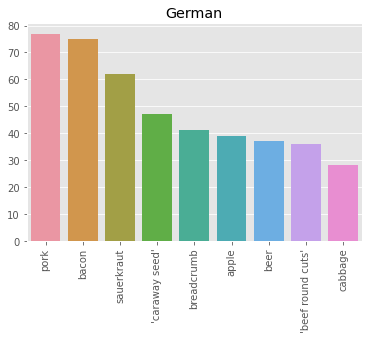

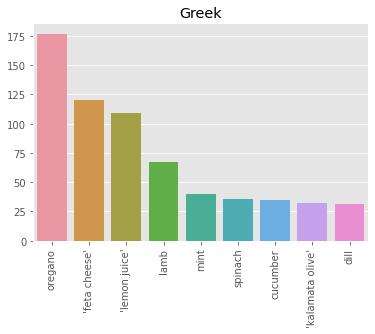

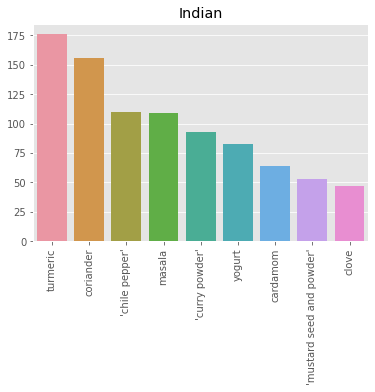

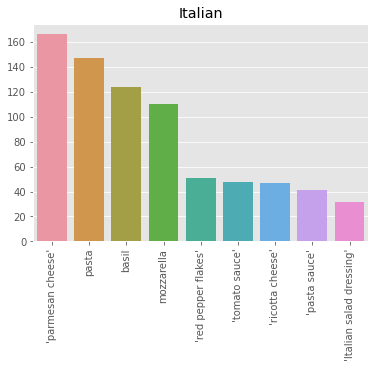

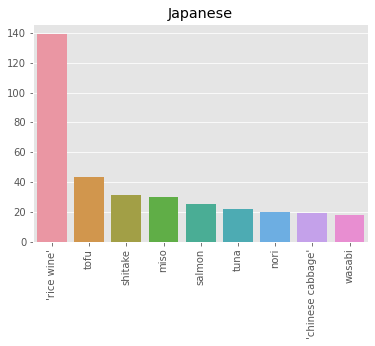

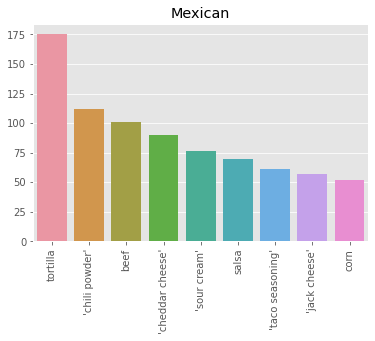

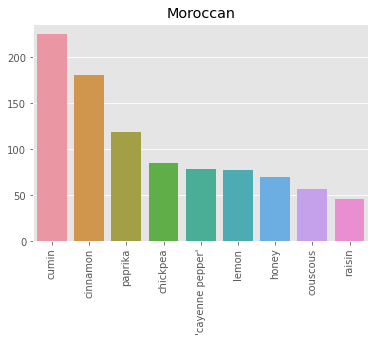

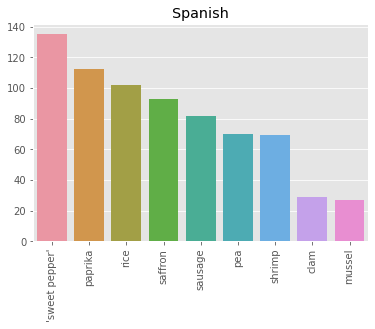

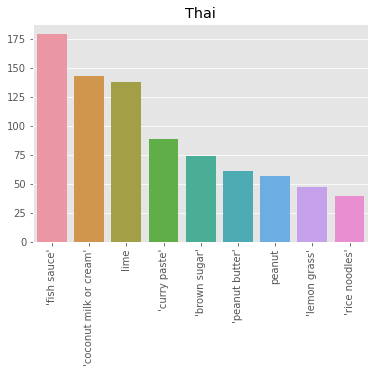

In [18]:
for key, value in cuisines_char_ingredients.items():
    plt.figure()
    sns.barplot(x = value.index[0:9], y = value[0:9])
    plt.title(key)
    plt.xticks(rotation=90)

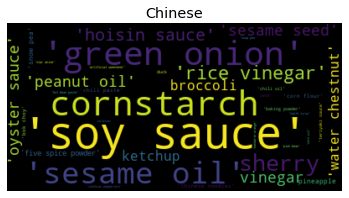

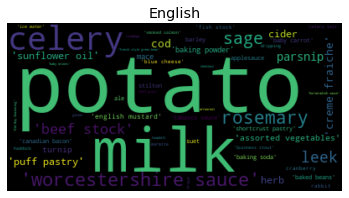

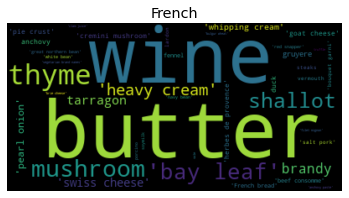

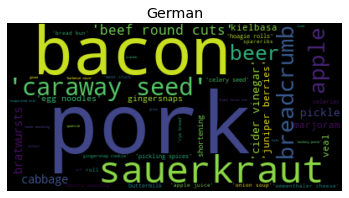

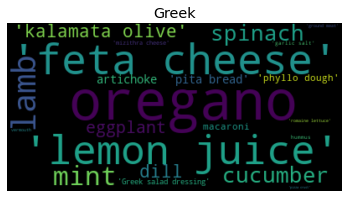

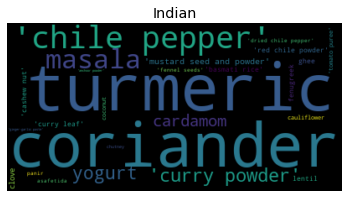

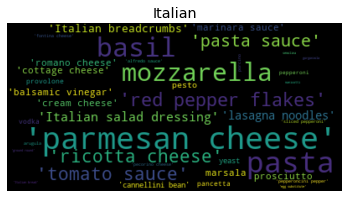

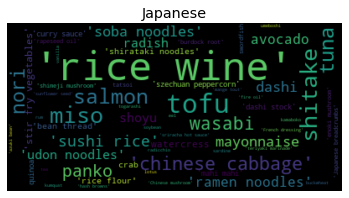

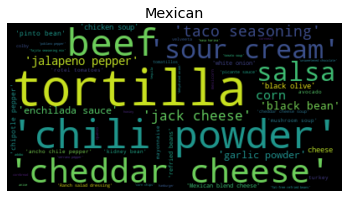

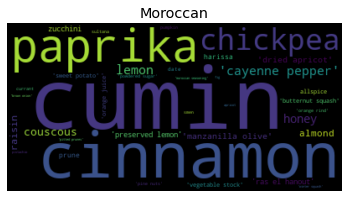

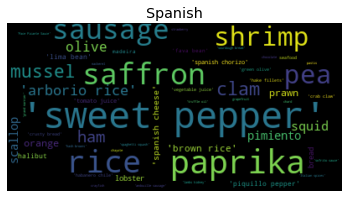

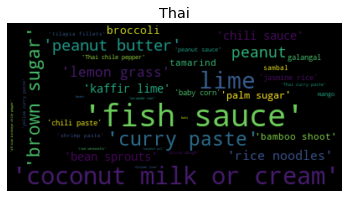

In [19]:
for key, value in cuisines_char_ingredients.items():
    wordcloud = WordCloud()
    wordcloud.generate_from_frequencies(frequencies=value)
    plt.figure()
    plt.title(key)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# 3. Count ingredients per recipe

In [20]:
means = {}
means_minus_std = {}
means_plus_std = {}
labels = cuisines.cuisine_label
for c in range(12):
    df = recipes[recipes.cuisine == c]
    means[labels[c]] = df.sum(axis=1).mean(axis=0)
    std = df.sum(axis=1).std(axis=0)
    means_minus_std[labels[c]] = means[labels[c]] - std
    means_plus_std[labels[c]] = means[labels[c]] + std

In [22]:
means_df = pd.DataFrame(list(means.items()), columns=['cuisine', 'mean'])
means_df = means_df.sort_values('mean')

# This is not being used (see commented lines in cell below)
means_minus_std_df = pd.DataFrame(list(means_minus_std.items()), columns=['cuisine', 'mean'])
means_minus_std_df = means_minus_std_df.sort_values('mean')
means_plus_std_df = pd.DataFrame(list(means_plus_std.items()), columns=['cuisine', 'mean'])
means_plus_std_df = means_plus_std_df.sort_values('mean')

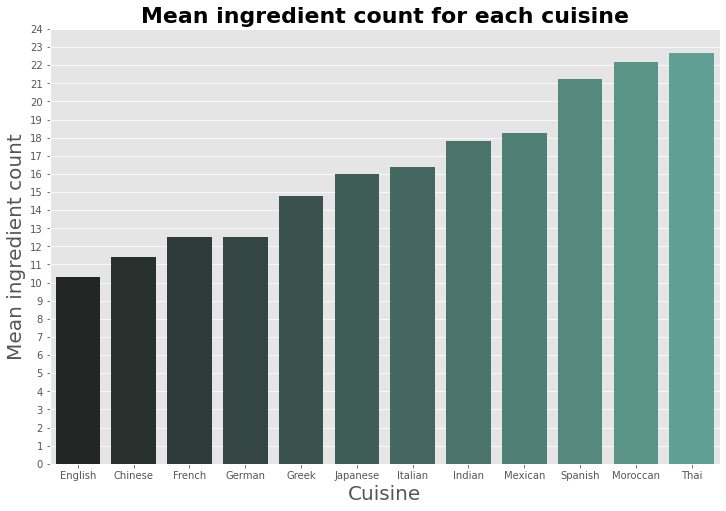

In [23]:
fig, ax = plt.subplots(figsize=(12,8));
sns.barplot(x='cuisine', y='mean', data=means_df, palette='dark:#5A9')
#sns.barplot(x='cuisine', y='mean', data=means_minus_std_df, palette='light:#5A9', alpha=0.7)
#sns.barplot(x='cuisine', y='mean', data=means_plus_std_df, palette='dark:#5A9', alpha=0.7)
ax.set_yticks(np.arange(25))
ax.set_xlabel('Cuisine', size=20)
ax.set_ylabel('Mean ingredient count', size=20)
ax.set_title('Mean ingredient count for each cuisine', size=22, fontweight="bold")
plt.show()

# 4. PCA

In [25]:
X_train = recipes.drop('cuisine', axis=1) 
y_train = pd.DataFrame(recipes.cuisine)
y_train.set_index(X_train.index, inplace=True)

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 12)
X_pca = pca.fit_transform(X_train)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

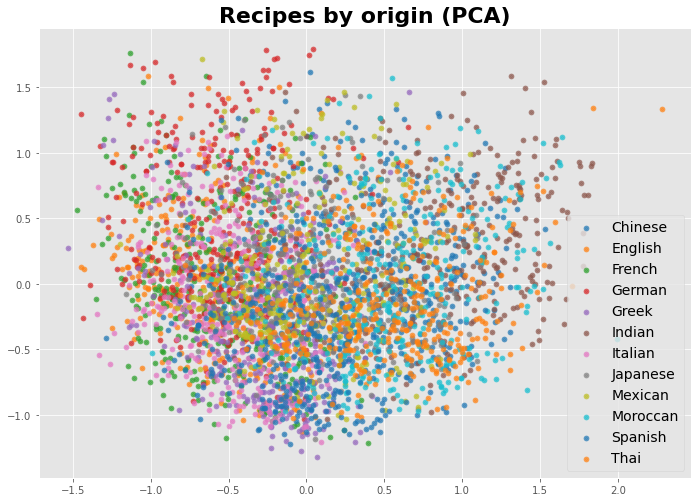

In [27]:
palette = sns.color_palette("tab10", n_colors = 12)

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

plt.title("Recipes by origin (PCA)", size=22, fontweight="bold")
for i, cur_origin in enumerate(np.unique(y_train)):
    plot = plt.scatter(X_pca[(y_train == cur_origin)['cuisine'], 1], X_pca[(y_train == cur_origin)['cuisine'], 2], 
                c = palette[i], label = cur_origin, s = 5, linewidth=3.5, alpha=0.7)
    plot.set_label(cuisines.cuisine_label[i])

plt.legend(fontsize=14, loc='best')
plt.show()
#plt.savefig("pca.png")

# 5. High correlation pairs

In [28]:
pearsons_corr = X_train.corr(method='pearson', min_periods=1)
pearsons_corr.replace(1.0, -2.0, inplace=True)
pearsons_corr

,'acorn squash',adobo,'african birdseye chile pepper',ale,'aleppo pepper','alfalfa sprouts','alfredo sauce',allspice,almond,'almond butter',...,yams,yeast,'yellow curry paste','yellow food coloring','yellow split pea','yellow squash',yogurt,zaatar,zest,zucchini
'acorn squash',-2.000000,-0.000915,-0.000818,-0.000915,-0.000409,-0.000709,-0.000818,-0.003081,-0.003764,-0.000409,...,-0.000409,-0.001834,-0.000709,-0.000409,-0.000709,-0.001295,-0.005083,-0.000579,-0.001587,-0.004604
adobo,-0.000915,-2.000000,-0.001057,-0.001182,-0.000528,-0.000915,-0.001057,-0.003979,-0.004860,-0.000528,...,-0.000528,-0.002368,-0.000915,-0.000528,-0.000915,-0.001672,-0.006564,-0.000747,-0.002049,-0.005945
'african birdseye chile pepper',-0.000818,-0.001057,-2.000000,-0.001057,-0.000472,-0.000818,-0.000945,-0.003558,-0.004346,-0.000472,...,-0.000472,-0.002117,-0.000818,-0.000472,-0.000818,-0.001496,-0.005870,-0.000668,-0.001833,0.040458
ale,-0.000915,-0.001182,-0.001057,-2.000000,-0.000528,-0.000915,-0.001057,-0.003979,-0.004860,-0.000528,...,-0.000528,-0.002368,-0.000915,-0.000528,-0.000915,-0.001672,-0.006564,-0.000747,-0.002049,-0.005945
'aleppo pepper',-0.000409,-0.000528,-0.000472,-0.000528,-2.000000,-0.000409,-0.000472,-0.001779,-0.002172,-0.000236,...,-0.000236,-0.001058,-0.000409,-0.000236,-0.000409,-0.000747,-0.002934,-0.000334,-0.000916,-0.002657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
'yellow squash',-0.001295,-0.001672,-0.001496,-0.001672,-0.000747,-0.001295,-0.001496,-0.005630,-0.006877,-0.000747,...,-0.000747,-0.003350,-0.001295,-0.000747,-0.001295,-2.000000,-0.009288,-0.001057,-0.002900,0.194383
yogurt,-0.005083,-0.006564,-0.005870,-0.006564,-0.002934,0.043087,-0.005870,0.022778,0.065464,-0.002934,...,-0.002934,-0.013151,-0.005083,-0.002934,-0.005083,-0.009288,-2.000000,-0.004150,-0.011382,-0.025387
zaatar,-0.000579,-0.000747,-0.000668,-0.000747,-0.000334,-0.000579,-0.000668,-0.002516,-0.003073,-0.000334,...,-0.000334,-0.001497,-0.000579,-0.000334,-0.000579,-0.001057,-0.004150,-2.000000,-0.001296,0.060961
zest,-0.001587,-0.002049,-0.001833,-0.002049,-0.000916,-0.001587,-0.001833,-0.006900,-0.008427,-0.000916,...,-0.000916,-0.004106,-0.001587,-0.000916,-0.001587,-0.002900,-0.011382,-0.001296,-2.000000,-0.010309


In [31]:
# Find all rows with Person's correlation coefficient > 0.7
high_correlation = pd.DataFrame()
for c in pearsons_corr.columns:
    rows = pearsons_corr[pearsons_corr[c] > 0.7]
    if rows.shape[0] > 0:
        high_correlation = high_correlation.append(rows)
display(high_correlation)

,'acorn squash',adobo,'african birdseye chile pepper',ale,'aleppo pepper','alfalfa sprouts','alfredo sauce',allspice,almond,'almond butter',...,yams,yeast,'yellow curry paste','yellow food coloring','yellow split pea','yellow squash',yogurt,zaatar,zest,zucchini
'coconut oil',-0.000579,-0.000747,-0.000668,-0.000747,-0.000334,-0.000579,-0.000668,-0.002516,-0.003073,0.707023,...,-0.000334,-0.001497,-0.000579,-0.000334,-0.000579,-0.001057,-0.004150,-0.000472,-0.001296,-0.003758
kamaboko,-0.000409,-0.000528,-0.000472,-0.000528,-0.000236,-0.000409,-0.000472,-0.001779,-0.002172,-0.000236,...,-0.000236,-0.001058,-0.000409,-0.000236,-0.000409,-0.000747,-0.002934,-0.000334,-0.000916,-0.002657
'sea cucumber',-0.000409,-0.000528,-0.000472,-0.000528,-0.000236,-0.000409,-0.000472,-0.001779,-0.002172,-0.000236,...,-0.000236,-0.001058,-0.000409,-0.000236,-0.000409,-0.000747,-0.002934,-0.000334,-0.000916,-0.002657
'almond butter',-0.000409,-0.000528,-0.000472,-0.000528,-0.000236,-0.000409,-0.000472,-0.001779,-0.002172,-2.000000,...,-0.000236,-0.001058,-0.000409,-0.000236,-0.000409,-0.000747,-0.002934,-0.000334,-0.000916,-0.002657
gumbo,-0.000409,-0.000528,-0.000472,-0.000528,-0.000236,-0.000409,-0.000472,-0.001779,-0.002172,-0.000236,...,-0.000236,-0.001058,-0.000409,-0.000236,-0.000409,-0.000747,-0.002934,-0.000334,-0.000916,-0.002657
'french style green bean',-0.000579,-0.000747,-0.000668,-0.000747,-0.000334,-0.000579,-0.000668,-0.002516,-0.003073,-0.000334,...,-0.000334,-0.001497,-0.000579,-0.000334,-0.000579,-0.001057,-0.004150,-0.000472,-0.001296,-0.003758
'burdock root',-0.000579,-0.000747,-0.000668,-0.000747,-0.000334,-0.000579,-0.000668,-0.002516,-0.003073,-0.000334,...,-0.000334,-0.001497,-0.000579,-0.000334,-0.000579,-0.001057,-0.004150,-0.000472,-0.001296,-0.003758
'sofrito sauce',-0.000579,0.315742,-0.000668,-0.000747,-0.000334,-0.000579,-0.000668,-0.002516,-0.003073,-0.000334,...,-0.000334,-0.001497,-0.000579,-0.000334,-0.000579,-0.001057,-0.004150,-0.000472,-0.001296,-0.003758
'Chinese mushroom',-0.000579,-0.000747,-0.000668,-0.000747,-0.000334,-0.000579,-0.000668,-0.002516,-0.003073,-0.000334,...,-0.000334,-0.001497,-0.000579,-0.000334,-0.000579,-0.001057,-0.004150,-0.000472,-0.001296,-0.003758
'sazon goya',-0.000709,0.257528,-0.000818,-0.000915,-0.000409,-0.000709,-0.000818,-0.003081,-0.003764,-0.000409,...,-0.000409,-0.001834,-0.000709,-0.000409,-0.000709,-0.001295,-0.005083,-0.000579,-0.001587,-0.004604


In [32]:
high_corr_pairs = {}
for row, index in enumerate(high_correlation.index):
    for column in high_correlation.columns:
        if high_correlation.iloc[row][column] > 0.7:
            high_corr_pairs[index] = [column, high_correlation.iloc[row][column]]
high_corr_pairs

{"'coconut oil'": ["'almond butter'", 0.7070232925763996],
 'kamaboko': ["'burdock root'", 0.7070232925763993],
 "'sea cucumber'": ["'Chinese mushroom'", 0.7070232925763993],
 "'almond butter'": ["'coconut oil'", 0.7070232925763996],
 'gumbo': ["'french style green bean'", 0.7070232925763987],
 "'french style green bean'": ['gumbo', 0.7070232925763987],
 "'burdock root'": ['kamaboko', 0.7070232925763993],
 "'sofrito sauce'": ["'sazon goya'", 0.8164001538142004],
 "'Chinese mushroom'": ["'sea cucumber'", 0.7070232925763993],
 "'sazon goya'": ["'sofrito sauce'", 0.8164001538142004]}

### High correlation pairs:
* (coconut oil, almond butter) - 0.707
* (kamaboko, burdock root) - 0.707
* (sea cucumber, Chinese mushroom) - 0.707
* (gumbo, french style green bean) - 0.707
* (sofrito sauce, sazon goya) - 0.816